<a href="https://colab.research.google.com/github/sarnavadatta/Predictive-Modelling/blob/main/PredictiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive/DS projects/Breast Cancer Prediction/'

breast_cancer.csv  PredictiveModel.ipynb


There were ten real-valued features are computed for each cell nucleus :

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter² / area — 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

The “Unnamed” column does not seem to have any useful data which could be useful for building a machine learning models. Hence, will remove it before further analysis.

In [4]:
df = pd.read_csv('/content/drive/My Drive/DS projects/Breast Cancer Prediction/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Drop the id and unnamed:32 column from the daraframe

df = df.drop(['id', 'Unnamed: 32'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
print("columns of data:", df.columns)

columns of data: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
print("shape of data:",df.shape)

shape of data: (569, 31)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [10]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

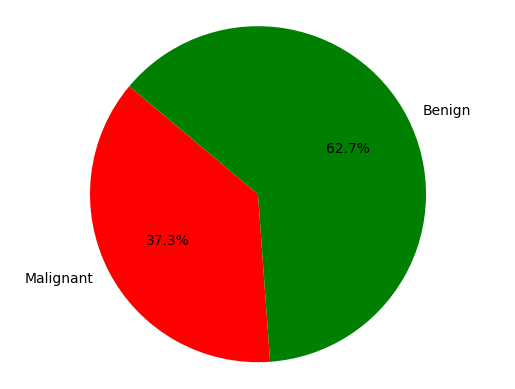

In [11]:
Malignant=sum(df[df['diagnosis']=='M'].count())
Benign = sum(df[df['diagnosis']=='B'].count())

# Data to plot
labels = 'Malignant', 'Benign'
sizes = [Malignant,Benign]
colors = ['red', 'green']
#explode = (0.5, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [12]:
# Replace M with 1 and B with 0 (else 0)
print("Malignant = 1, Benign = 0")
df["diagnosis"]= df["diagnosis"].map(lambda row: 1 if row=='M' else 0)
df.head()

Malignant = 1, Benign = 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


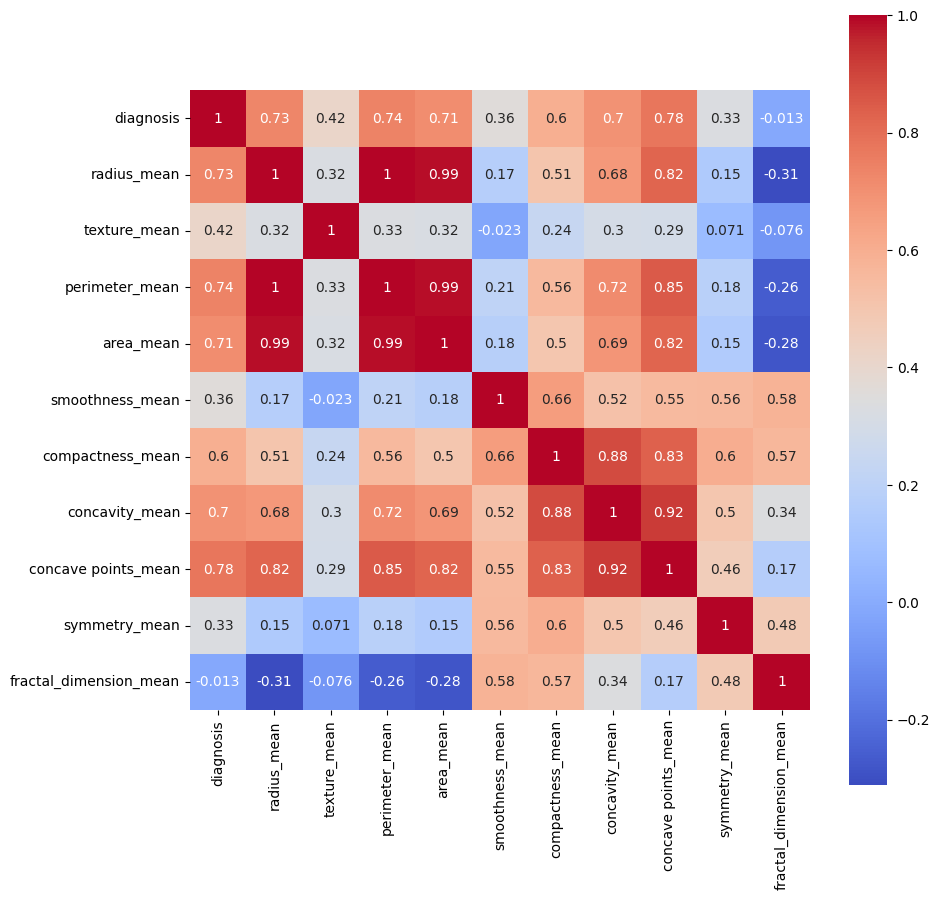

In [13]:
features_mean= list(df.columns[1:11])
plt.figure(figsize=(10,10))
# Create a list of columns to include 'diagnosis' and features_mean
selected_columns_mean = ['diagnosis'] + features_mean
# Select the desired columns using the list of column names
sns.heatmap(df[selected_columns_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()


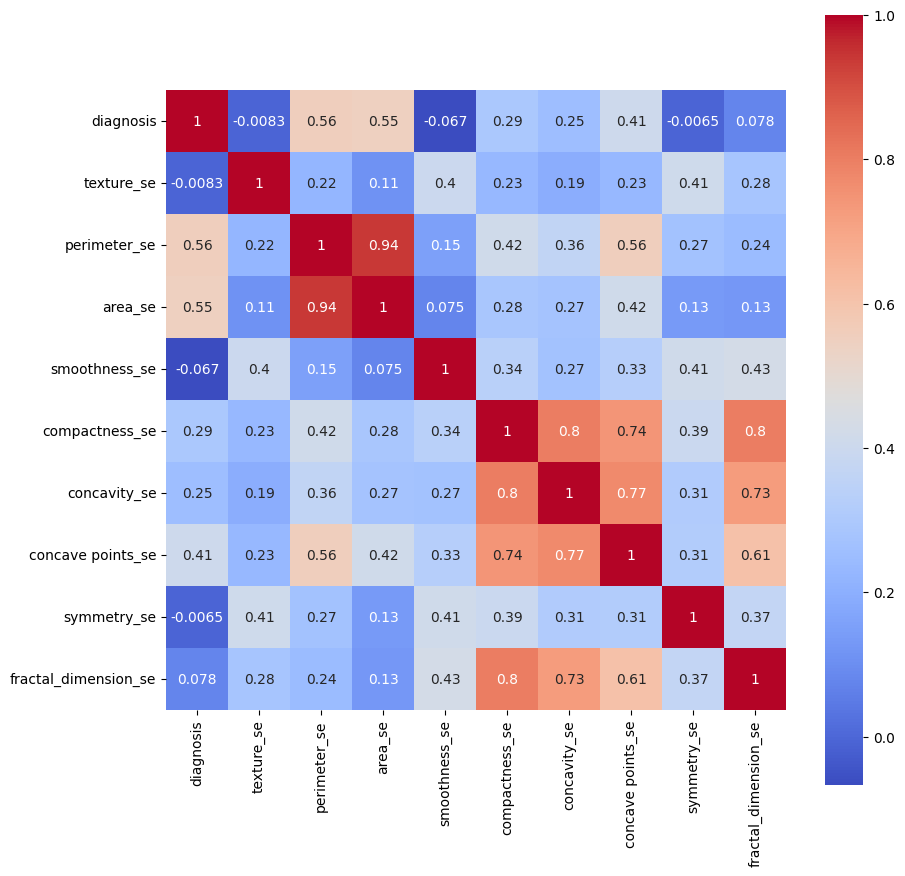

In [14]:
features_se= list(df.columns[12:21])
plt.figure(figsize=(10,10))
# Create a list of columns to include 'diagnosis' and features_mean
selected_columns_se = ['diagnosis'] + features_se
# Select the desired columns using the list of column names
sns.heatmap(df[selected_columns_se].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()


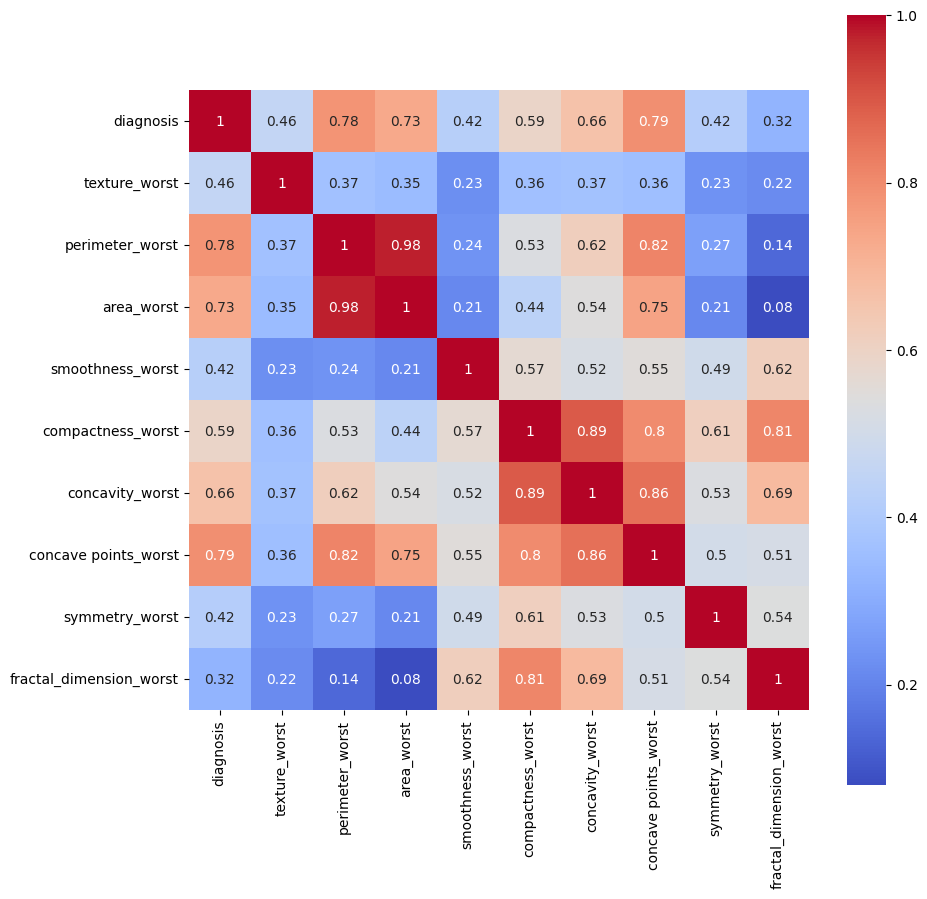

In [15]:
features_worst= list(df.columns[22:31])
plt.figure(figsize=(10,10))
# Create a list of columns to include 'diagnosis' and features_mean
selected_columns_worst = ['diagnosis'] + features_worst
# Select the desired columns using the list of column names
sns.heatmap(df[selected_columns_worst].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

**Predictive Models**

In [16]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [19]:
! pip install xgboost

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [21]:
models={
    "Logisitic Regression":LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9868
- F1 score: 0.9868
- Precision: 0.9880
- Recall: 0.9763
- Roc Auc Score: 0.9847
----------------------------------
Model performance for Test set
- Accuracy: 0.9825
- F1 score: 0.9824
- Precision: 1.0000
- Recall: 0.9535
- Roc Auc Score: 0.9767


KNN Classifier
Model performance for Training set
- Accuracy: 0.9802
- F1 score: 0.9801
- Precision: 1.0000
- Recall: 0.9467
- Roc Auc Score: 0.9734
----------------------------------
Model performance for Test set
- Accuracy: 0.9561
- F1 score: 0.9560
- Precision: 0.9524
- Recall: 0.9302
- Roc Auc Score: 0.9510


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8947
- F1 score: 0.8942
- Precision: 0.8780
- Recall: 0.8372
- Roc Auc Score: 0.8834


Random Forest
Model performance for Training se

<Axes: >

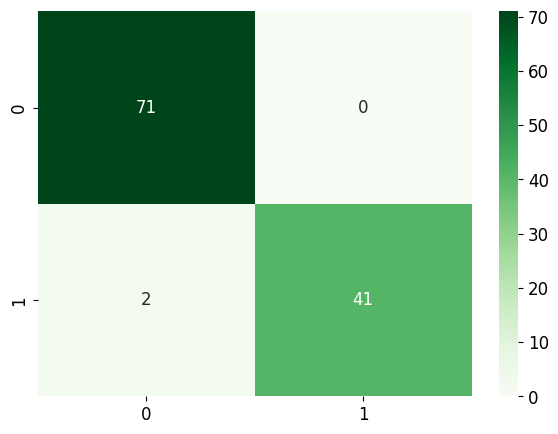

In [22]:
# Since logistic regression performs the best, create the confusion matrix for logistic regression classifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'model' is your trained Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm_LR = confusion_matrix(y_test, y_pred)

#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 12})
sns.heatmap(cm_LR,annot=True,cmap='Greens')


**Use Artificial Neural Network**

In [33]:
# create a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scale.fit_transform(X_train)
X_val = scale.fit_transform(X_val)
X_test = scale.fit_transform(X_test)

In [34]:
#Creating a Model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import layers


# Create a sequential model, where layers are added one after another.
model = Sequential()

# Add a dense (fully connected) layer with 128 neurons and ReLU activation.
# 'input_shape' specifies the shape of the input features.
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# Add a dropout layer with a 50% dropout rate to prevent overfitting.
model.add(Dropout(0.5))
# Add more dense layers with ReLU activation and dropout.
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.5))

# Add the final dense layer with 1 neuron and sigmoid activation for binary classification.
model.add(layers.Dense(1, activation='sigmoid'))

# --- Model Compilation ---

# Compile the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- Early Stopping Callback ---

# Create an EarlyStopping callback to prevent overfitting.
# 'monitor' specifies the metric to monitor (validation loss).
# 'mode' specifies whether to minimize or maximize the metric ('min' for loss).
# 'verbose=1' prints messages when early stopping occurs.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# --- Model Training ---

# Train the model with the training data and validate with the validation data.
# 'epochs' specifies the maximum number of training epochs.
# 'batch_size' specifies the batch size for gradient descent.
# 'callbacks' applies the early stopping callback.
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop])

# Learning Process of a model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3921 - loss: 0.9871 - val_accuracy: 0.6316 - val_loss: 0.6080
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5578 - loss: 0.6983 - val_accuracy: 0.9123 - val_loss: 0.5813
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5964 - loss: 0.6694 - val_accuracy: 0.9561 - val_loss: 0.5347
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7005 - loss: 0.5816 - val_accuracy: 0.9649 - val_loss: 0.4471
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7374 - loss: 0.5212 - val_accuracy: 0.9737 - val_loss: 0.3530
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8210 - loss: 0.4520 - val_accuracy: 0.9737 - val_loss: 0.2682
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7761 - loss: 0.4438 - val_accuracy: 0.9737 - val_loss: 0.1972
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8495 - loss: 0.3883 - val_accuracy: 0.9825 - v

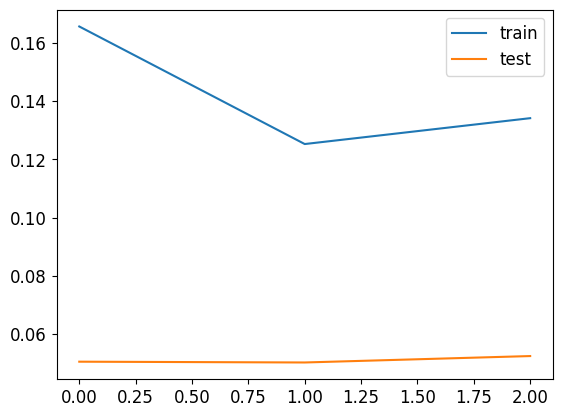

In [35]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [36]:
# Testing ANN Model
#seperating as class 0 and 1 as per sigmoid function
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [37]:
y_pred = (y_pred > 0.5)

In [38]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9850 - loss: 0.0756


In [39]:
print(f'Loss in the ANN Model design : {loss:.4f}')
print(f'Accuracy in the ANN Model design : {accuracy*100:.4f}')

Loss in the ANN Model design : 0.0525
Accuracy in the ANN Model design : 99.1228


<Axes: >

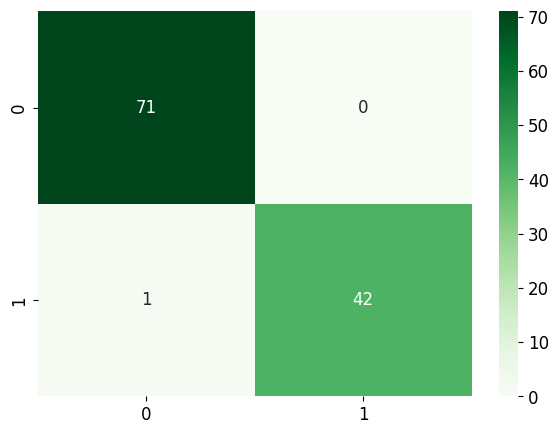

In [40]:
cm_ann = confusion_matrix(y_test, y_pred)

#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 12})
sns.heatmap(cm_ann,annot=True,cmap='Greens')
